# Assignment 1: k-Nearest Neighbors multi-classification

In this assignment you'll have to predict the decisions made about cars. There are 4 potential decisions:

- 'unacc': unacceptable
- 'acc', : acceptable
- 'good',: good
- 'vgood': very good

Because there are 4 decision options this is called a multi-class classification problem. Please be aware that these decision categories are ordinal. The "lowest" decision is unacceptable and the "highest" decision is very good. 

Using 6 cars' features you'll try to predict the decision that will be made. These features are stored in the first 6 columns of the dataset. The seventh column contains the decisions made about the cars.

## 1 import and pre-process dataset
- Run the next cell to import libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### 1A import data set
- import the csv file cars.csv into a dataframe
- inspect the dataframe to make sure the data is correctly imported. Hint: check the number of rows. 

In [3]:
df = pd.read_csv('cars.csv', header = None )
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### 1B change column names
- Change the names of the columns:
    - First column name: 'buy_price'
    - Second column name: 'maint_cost'
    - Third:'num_doors'
    - Fourth: 'num_persons'
    - Fifth: 'lug_boot'
    - Sixth:'safety'
    - Last: 'decision'
- Check if the column names are correctly changed

In [4]:
df.columns = ['buy_price','maint_cost','num_doors','num_persons','lug_boot','safety','decision']
col_names = list(df.columns)
df

,buy_price,maint_cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### 1C Determine unique values in each columns
- Make 7 lists that show the unique values of each column.
- Hint: the set() function shows unique values.

In [5]:
bp = list(set(df['buy_price']))
mc = list(set(df['maint_cost']))
nd = list(set(df['num_doors']))
np = list(set(df['num_persons']))
lb = list(set(df['lug_boot']))
sy = list(set(df['safety']))
dn = list(set(df['decision']))

display('bp', bp, 'mc', mc, 'nd' , nd , 'np', np, 'lb', lb, 'sy', sy, 'dn', dn)

'bp'

['low', 'high', 'vhigh', 'med']

'mc'

['low', 'high', 'vhigh', 'med']

'nd'

['5more', '4', '2', '3']

'np'

['4', '2', 'more']

'lb'

['small', 'big', 'med']

'sy'

['low', 'high', 'med']

'dn'

['unacc', 'acc', 'vgood', 'good']

### 1D convert to numeric values
- Copy the dataframe into a new dataframe
- Change the values in each column into numeric values
- All values are values on an ordinal scale. Because of this the values have to be in the right order. Example: 

    - 'low', 'med', 'high', 'vhigh' should be numbered from low to high. For example 'low' becomes number 1, 'med' becomes number 2, 'high' becomes number 3 etc. A similar way of numbering has to be applied to all columns.

In [6]:
cars = df.copy()

In [7]:
cars.buy_price.replace(('low', 'med', 'high', 'vhigh'),(1,2,3,4), inplace=True)
cars.maint_cost.replace(('low', 'med', 'high', 'vhigh'),(1,2,3,4), inplace=True)
cars.num_doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
cars.num_persons.replace(('2','4','more'),(1,2,3), inplace=True)
cars.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
cars.safety.replace(('low','med','high'),(1,2,3), inplace=True)
cars.decision.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

### 1E Check the dataframe
- Check if there are any missing values or outliers.
- Make a visualation that shows how the values in each column are distributed.
- What do you notice about these distributions?
- Do you think this is a real dataset or a synthetic dataset? Why?

In [8]:
cars.dtypes

buy_price      int64
maint_cost     int64
num_doors      int64
num_persons    int64
lug_boot       int64
safety         int64
decision       int64
dtype: object

In [9]:
cars.isna().any()

buy_price      False
maint_cost     False
num_doors      False
num_persons    False
lug_boot       False
safety         False
decision       False
dtype: bool

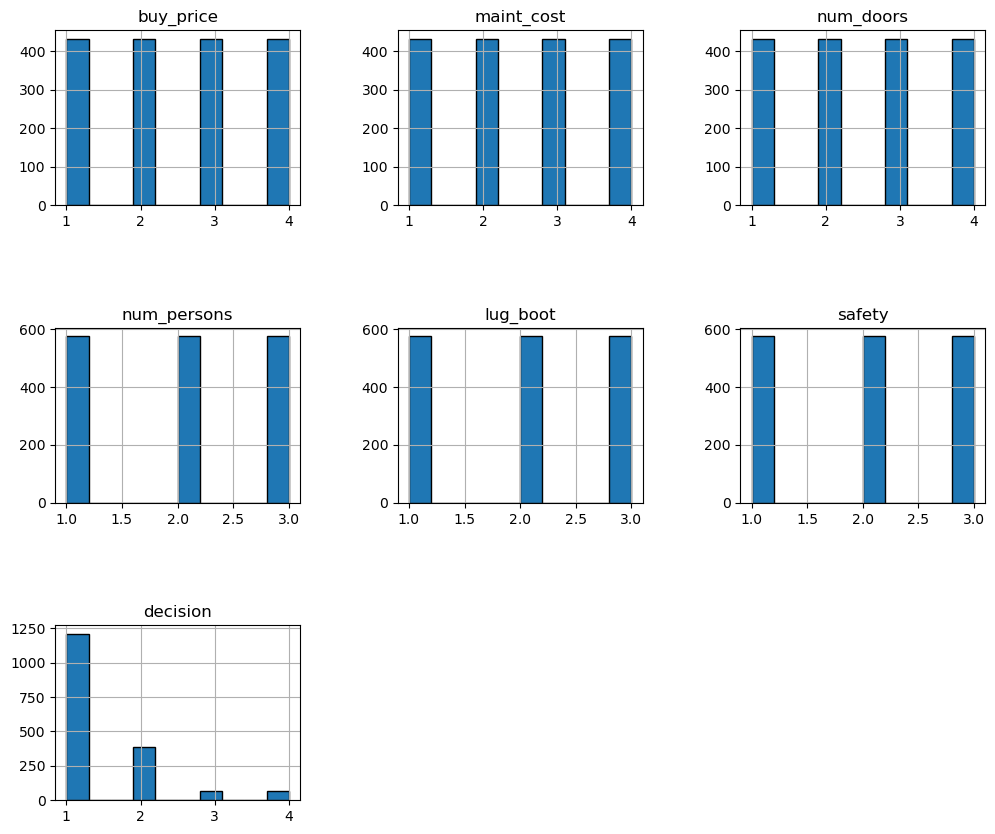

In [10]:
# lookslike no pre-processing needed.

cars.hist(figsize=(12, 10), bins=10, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [11]:
# This lookslike a synthetic data set, it s too clean.

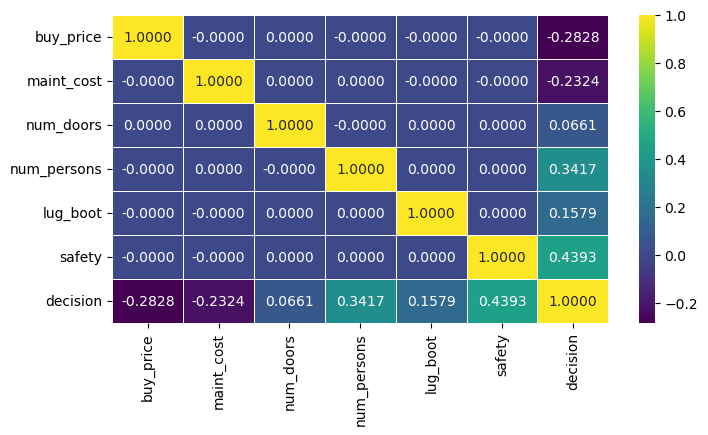

In [12]:
fig, ax = plt.subplots(figsize=(8,4))

sns.heatmap(cars[["buy_price","maint_cost","num_doors","num_persons","lug_boot","safety","decision"]].corr(), annot=True, cmap="viridis", fmt=".4f", linewidths=.6)
plt.show()

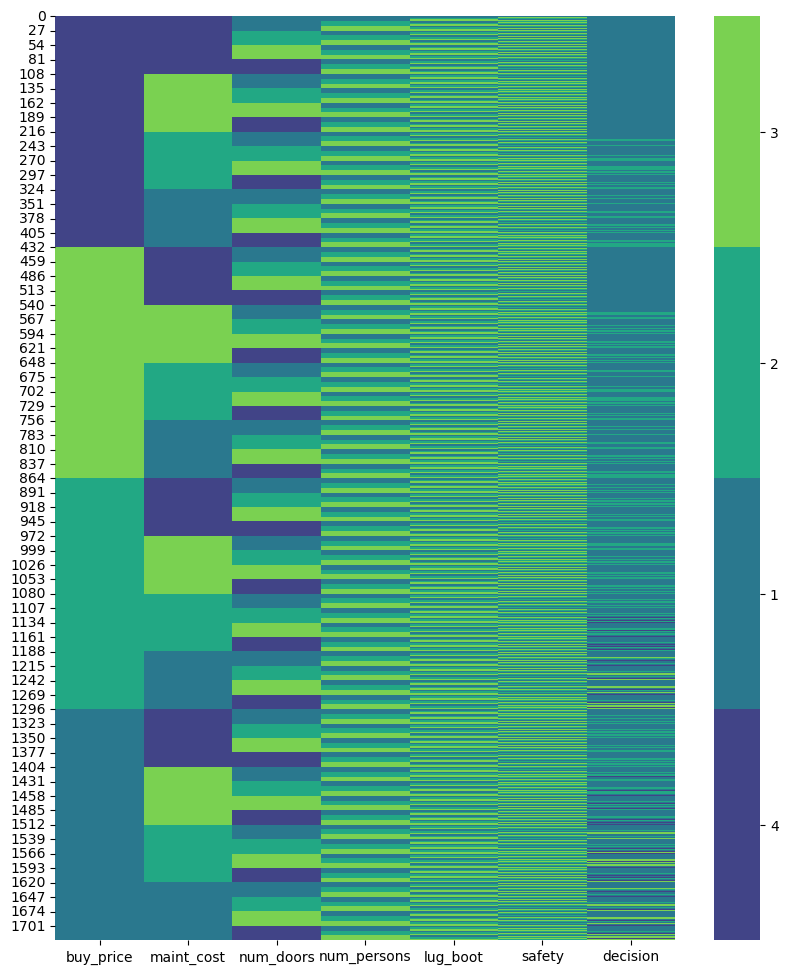

In [13]:
# it doesnt really make sense to create a heatmap for categorical values. Let s try something else
fig, ax = plt.subplots(figsize=(10,12))

value_to_int = {j:i for i,j in enumerate(pd.unique(cars.values.ravel()))} 
n = len(value_to_int)     

# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("viridis", n) 
ax = sns.heatmap(cars.replace(value_to_int), cmap=cmap) 

# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()

# we can better check this for the edge values
# for decision unaccepted 1 and very good 4

In [14]:
cars.shape
cars.columns
cars.count()

buy_price      1728
maint_cost     1728
num_doors      1728
num_persons    1728
lug_boot       1728
safety         1728
decision       1728
dtype: int64

In [15]:
# lets see what is unaccepted. i think that s a good criteria to check.
cars_test = cars[cars["decision"] == 1]
cars_test.count()

buy_price      1210
maint_cost     1210
num_doors      1210
num_persons    1210
lug_boot       1210
safety         1210
decision       1210
dtype: int64

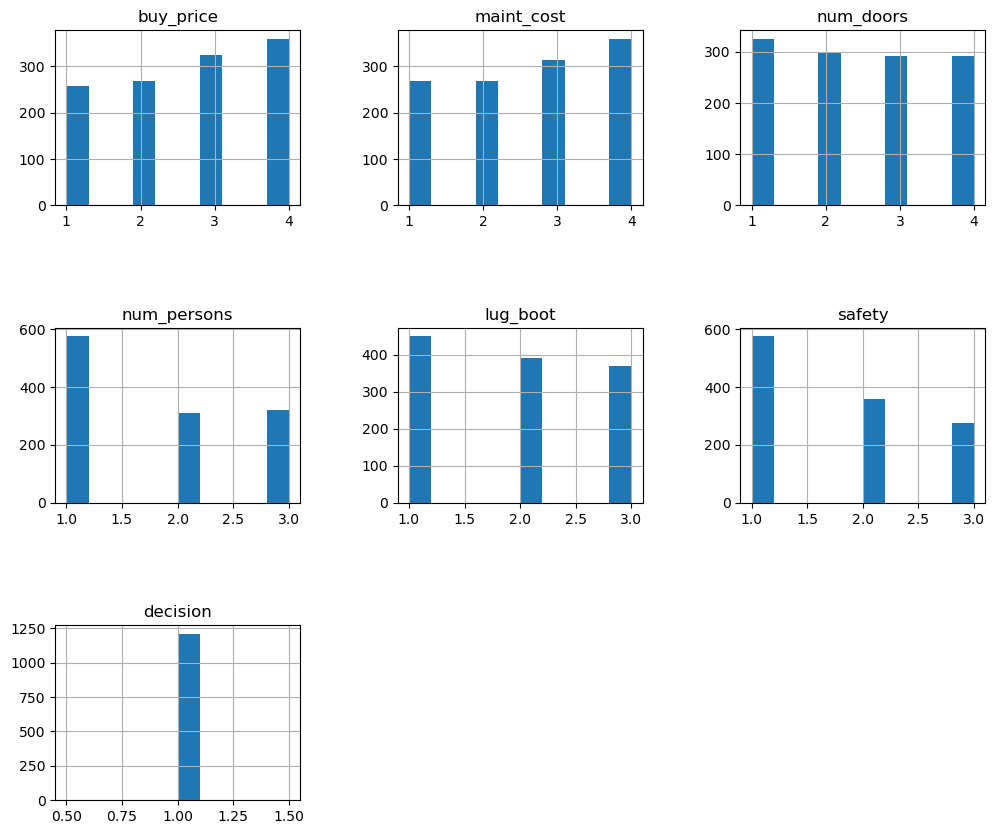

In [16]:
# lookslike 1210 of 1728 entries are unaccepted

cars_test.hist(figsize=(12, 10))
plt.subplots_adjust(hspace=0.7, wspace=0.4)


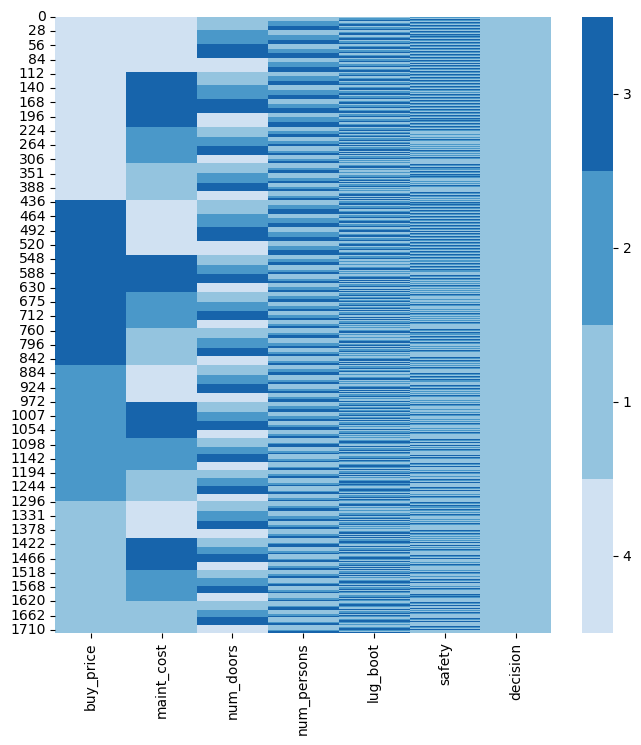

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

value_to_int = {j:i for i,j in enumerate(pd.unique(cars_test.values.ravel()))} 
n = len(value_to_int)     

# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Blues", n) 
ax = sns.heatmap(cars_test.replace(value_to_int), cmap=cmap) 

# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()

In [18]:
# so only 518 entries of the 1728 entries are accepted.
# now lets check what s the perfect out come 4 (very good)
cars_test_2 = cars[cars["decision"] == 4]
cars_test_2.count()

buy_price      65
maint_cost     65
num_doors      65
num_persons    65
lug_boot       65
safety         65
decision       65
dtype: int64

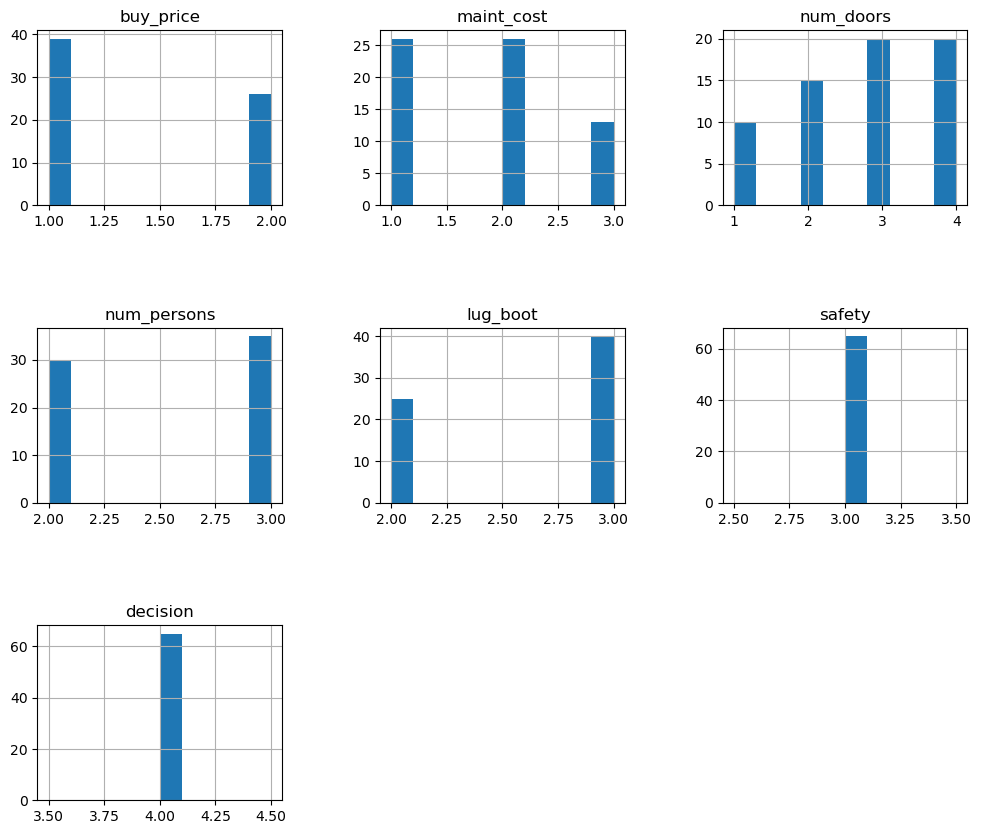

In [19]:
# only 65 entries were very good
cars_test_2.hist(figsize=(12, 10))
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# looking at the histogram to have a very good decision
# buy price has to be 'low' or 'med' which is 1 or 2
# has to be high safety which is 3 which is maximum available
# luggage space cant be small which is not 1
# car has to be for 4 or more people which is 3 or 4
# maintanance cost cant be high which is 4

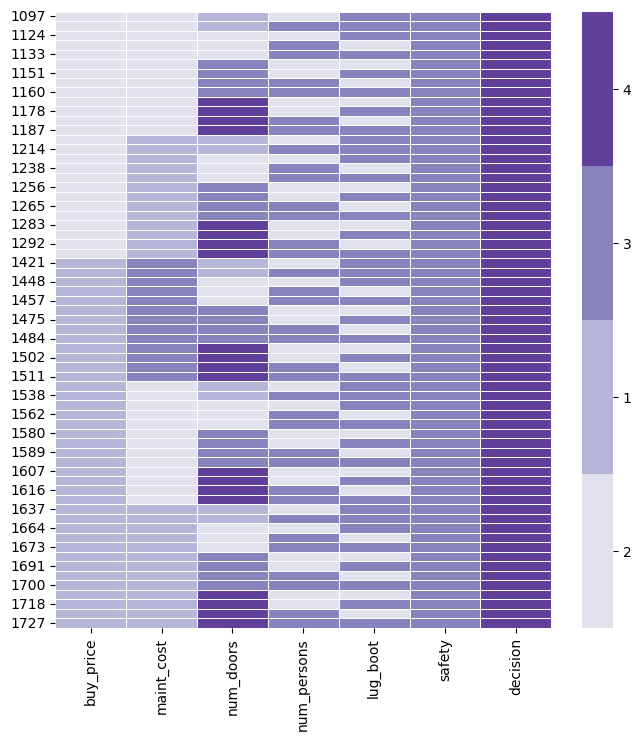

In [20]:
fig, ax = plt.subplots(figsize=(8,8))

value_to_int = {j:i for i,j in enumerate(pd.unique(cars_test_2.values.ravel()))} 
n = len(value_to_int)     

# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Purples", n) 
ax = sns.heatmap(cars_test_2.replace(value_to_int), cmap=cmap, linewidth=0.5) 

# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()

In [21]:
# Now we know our dataframe a bit better we can continue

## 2 Apply k-nearest neighbors

### 2A Train and test set
- Your goal is to predict the decision column
- Split the data into a train set and a test set
- Explain your choice for the test set size

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = cars[list(cars.columns)[0:-1]].values
y = cars["decision"].values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


(1728, 6) (1728,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9383429672447013


C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
print(f"{1210/1728*100:.2f}% of the data where the decision is 1 = unaccepted")
print(f"only {65/1728*100:.2f}% of the data where the decision is 4 = very good")
# I will split the data 80% train and 20%test
# I dont know what the target expectations are but this data set is kinda not that well balanced

70.02% of the data where the decision is 1 = unaccepted
only 3.76% of the data where the decision is 4 = very good


### 2B Fit and predict
- Apply the k-nearest neighbor classifier of scikit learn to fit your model.
- Predict the decisions of your test set and determine the accuracy of the model
- Change the number of neighbors the model considers when making the predictions. What happens to the accuracy?
- Find the optimal number of k (number of neighbors)


In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9402697495183044


C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
# 7 neighbors lookslike the most optimal one also by part 2A that was the case tried 6 7 and 8

### 2C Grid search and cross validation

#### 2C.1 parameter grid
- Create a parameter grid for the number of nearest neighbors (n_neighbors). It should include the numbers 1 till 10.

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


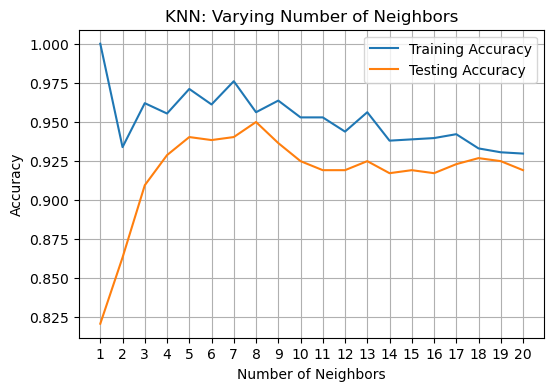

In [31]:
import numpy as np

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 21)

for neighbor in neighbors:    
    knn = KNeighborsClassifier(n_neighbors=neighbor)    
    knn.fit(X_train, y_train)    
    train_accuracies[neighbor] = knn.score(X_train, y_train)    
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
plt.figure(figsize=(6, 4))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.xticks(list(range(1,21,1)))
plt.show()

#### 2C.2 Apply grid search
- Import the grid search cv module of sklearn
- Create a grid search object that uses your parameter grid and applies 5-fold cross validation.
- Fit the grid search object

In [79]:
# class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, 
#                            n_jobs=None, refit=True, cv=None, 
#                            verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'n_neighbors': 7}
0.9334222780306597


C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### 2C.3 Best parameter setting and best score
- Show the best score and the best parameter setting for the number of neighbors.
- Is this result the same as in 2B? Why or why not?

In [45]:
print(grid_search.best_params_)
print(grid_search.best_score_)

# best parameter is same but best result is lower, has to do with random state=42?

{'n_neighbors': 7}
0.9334222780306597


#### 2C.4 Dataframe and visualization
- Create a dataframe that shows the results of the grid search
- Visualize the scores of each number of neighbors (1 till 10)

In [46]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006969,0.004850,0.010901,0.005589,1,{'n_neighbors': 1},0.812274,0.830325,0.807971,0.844203,...,0.817650,0.017735,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.005295,0.002785,0.011271,0.003457,2,{'n_neighbors': 2},0.826715,0.844765,0.844203,0.836957,...,0.842992,0.011658,9,0.924887,0.904072,0.928571,0.905063,0.923146,0.917148,0.010425
2,0.001612,0.002076,0.014150,0.003224,3,{'n_neighbors': 3},0.902527,0.880866,0.902174,0.894928,...,0.893635,0.008392,8,0.956561,0.945701,0.959313,0.954792,0.951175,0.953509,0.004713
3,0.002708,0.003409,0.016162,0.003713,4,{'n_neighbors': 4},0.913357,0.884477,0.916667,0.887681,...,0.900146,0.013045,7,0.947511,0.942081,0.958409,0.952984,0.949367,0.950070,0.005457
4,0.003008,0.003699,0.016849,0.005974,5,{'n_neighbors': 5},0.927798,0.949458,0.923913,0.905797,...,0.929074,0.014647,2,0.969231,0.970136,0.976492,0.973779,0.967450,0.971418,0.003271
5,0.003690,0.003233,0.014080,0.006305,6,{'n_neighbors': 6},0.920578,0.938628,0.927536,0.894928,...,0.923290,0.015474,4,0.962896,0.956561,0.970163,0.969259,0.967450,0.965266,0.005022
6,0.004604,0.003089,0.016433,0.005201,7,{'n_neighbors': 7},0.942238,0.935018,0.931159,0.913043,...,0.933422,0.011404,1,0.973756,0.964706,0.975588,0.980108,0.978300,0.974492,0.005358
7,0.003924,0.004080,0.017760,0.001913,8,{'n_neighbors': 8},0.927798,0.913357,0.923913,0.880435,...,0.921130,0.025655,5,0.963801,0.950226,0.962929,0.960217,0.968354,0.961106,0.006038
8,0.000603,0.001206,0.018079,0.003156,9,{'n_neighbors': 9},0.942238,0.927798,0.931159,0.876812,...,0.924732,0.024864,3,0.959276,0.947511,0.957505,0.961121,0.960217,0.957126,0.004954
9,0.003348,0.003700,0.015156,0.003942,10,{'n_neighbors': 10},0.902527,0.902527,0.920290,0.884058,...,0.905938,0.013520,6,0.948416,0.931222,0.948463,0.950271,0.943942,0.944463,0.006942


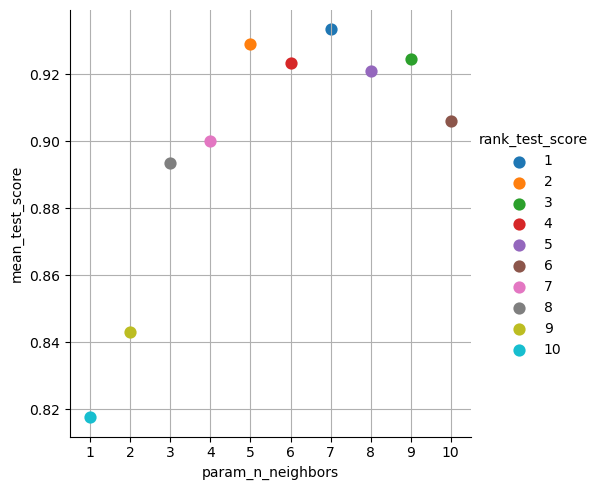

In [81]:
sns.catplot(kind="point", data = results, x='param_n_neighbors', y='mean_test_score',
            hue="rank_test_score")
plt.grid()
plt.show()

## 3 Classification metrics

### 3A Confusion matrix
- Do some research to find out what a confusion matrix is. What is it and why is it important for classification?
- Import the confusion matrix module from sklearn metrics
- Create a confusion matrix that compares your predicted decisions with the actual decisions

In [48]:
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, knn.predict(X_test))

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[239,   3,   0,   0],
       [ 22,  55,   0,   0],
       [  5,   1,   6,   2],
       [  0,   4,   0,   9]], dtype=int64)

### 3B Confusion matrix plot
A more convenient way to show a confusion matrix is to use the plot_confusion_matrix of scikit learn.
- Import the confusion matrix plot module
- Visualize the confusion matrix in two ways:
    - Show the absolute numbers
    - Show the relative (normalized) numbers
- Some predicted decisions are "higher" than the actual decisions and some are "lower". Explain why that is important in making decisions about cars.

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nurta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


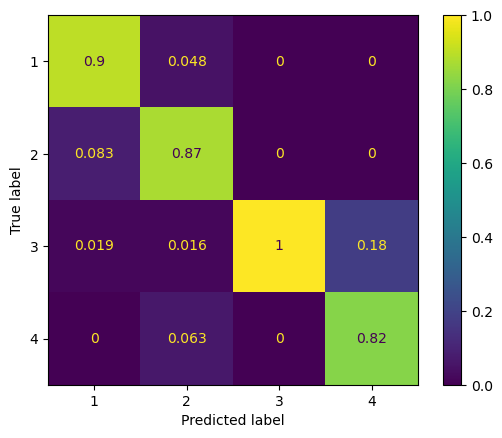

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, normalize="pred")

### 3C other metrics
- How would you describe this dataset. To what extent is this a balanced data set?
- Is accuracy a good metric to use here? Why or why not?
- Show a classification report that includes class recall, class precision and f1 scores.
- Explain what precision, recall and f1 score are using examples from the confusion matrix.
- For some classes there is unsufficient evidence. For which classes is this the case and why?
- Which metric is most important in the context of classifying cars and why?

In [61]:
# It lookslike safety is the most important. 
# Data set is balanced but this data set has too many unaccepted values compared to rest.

In [32]:
# knowing this caterogical values wouldnt be a good fit for linear regression
# lets check the results

from sklearn import linear_model

linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

predictions = linear.predict(X_test)

for i in range(len(predictions)):
    print(f"AVG prediction = {predictions[i]}, {X_test[i]}, actual result =  {y_test[i]}")

AVG prediction = 0.8673772629046332, [3 4 1 2 1 2], actual result =  1
AVG prediction = 1.6834472827535483, [1 1 1 1 3 2], actual result =  1
AVG prediction = 1.1994491273758867, [2 4 1 2 2 2], actual result =  1
AVG prediction = 1.1309170965485413, [1 4 4 2 2 1], actual result =  1
AVG prediction = 1.5030827093692514, [3 3 3 1 3 3], actual result =  1
AVG prediction = 1.6318887101354032, [1 3 4 1 1 3], actual result =  1
AVG prediction = 2.1516425943501085, [1 4 2 3 2 3], actual result =  2
AVG prediction = 1.1955086204426177, [4 2 1 3 3 1], actual result =  1
AVG prediction = 1.187794990835716, [4 2 2 2 2 2], actual result =  1
AVG prediction = 1.6080739889481535, [2 1 1 1 1 3], actual result =  1
AVG prediction = 2.3051248834205724, [4 1 4 3 3 3], actual result =  2
AVG prediction = 1.7361305265214682, [3 1 1 2 1 3], actual result =  2
AVG prediction = 0.9012661072015218, [2 1 3 1 1 1], actual result =  1
AVG prediction = 1.5525881251514262, [3 3 4 1 3 3], actual result =  1
AVG pre